In [1]:
import plotly.figure_factory as ff
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
import warnings
%matplotlib inline

In [2]:
dataEDA=pd.read_csv("/Users/ghaidaa/Desktop/Bike-sharing/hour.csv")



In [3]:
df_trainEx, df_test =train_test_split(dataEDA , test_size = 0.2 , random_state=0)

In [4]:
df_trainEx = dataEDA.rename(columns = {'instant':'rec_id', 'dteday':'datetime','weathersit':'weather', 'cnt':'total_count', 'dteday':'datetime','mnth':'month','temp':'temperature','holiday':'is_holiday', 'workingday':'is_workingday','hum':'humidity','yr':'year'})
df_trainEx['season'] = df_trainEx['season'].map({1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'})
df_trainEx['year'] = df_trainEx['year'].map({0:'2011', 1:'2012'})
df_trainEx['is_holiday'] = df_trainEx['is_holiday'].map({0:'No', 1:'Yes'})
df_trainEx['weekday'] = df_trainEx['weekday'].map({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'})
df_trainEx['is_workingday'] = df_trainEx['is_workingday'].map({0:'No', 1:'Yes'})
df_trainEx['weather'] = df_trainEx['weather'].map({1:'Clear', 2:'Cloudy', 3:'Rain', 4:'Storm'})



In [5]:
df_trainEx.columns

Index(['rec_id', 'datetime', 'season', 'year', 'month', 'hr', 'is_holiday',
       'weekday', 'is_workingday', 'weather', 'temperature', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'total_count'],
      dtype='object')

In [6]:
df_trainEx.head()

,rec_id,datetime,season,year,month,hr,is_holiday,weekday,is_workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,Winter,2011,1,0,No,Sunday,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,1,1,No,Sunday,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,1,2,No,Sunday,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,2011,1,3,No,Sunday,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,2011,1,4,No,Sunday,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
df_trainEx.columns

Index(['rec_id', 'datetime', 'season', 'year', 'month', 'hr', 'is_holiday',
       'weekday', 'is_workingday', 'weather', 'temperature', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'total_count'],
      dtype='object')

In [8]:
df_trainEx.sample(5)

,rec_id,datetime,season,year,month,hr,is_holiday,weekday,is_workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,total_count
11582,11583,2012-05-02,Spring,2012,5,19,No,Thursday,Yes,Clear,0.54,0.5152,0.77,0.2537,43,461,504
8373,8374,2011-12-20,Fall,2011,12,13,No,Wednesday,Yes,Cloudy,0.44,0.4394,0.54,0.1343,18,163,181
13639,13640,2012-07-27,Summer,2012,7,12,No,Saturday,Yes,Clear,0.84,0.7879,0.49,0.3582,92,207,299
5514,5515,2011-08-22,Summer,2011,8,16,No,Tuesday,Yes,Clear,0.74,0.6515,0.30,0.3881,66,254,320
15081,15082,2012-09-25,Fall,2012,9,14,No,Wednesday,Yes,Clear,0.66,0.6212,0.39,0.3284,80,213,293


In [9]:
df_trainEx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rec_id         17379 non-null  int64  
 1   datetime       17379 non-null  object 
 2   season         17379 non-null  object 
 3   year           17379 non-null  object 
 4   month          17379 non-null  int64  
 5   hr             17379 non-null  int64  
 6   is_holiday     17379 non-null  object 
 7   weekday        17379 non-null  object 
 8   is_workingday  17379 non-null  object 
 9   weather        17379 non-null  object 
 10  temperature    17379 non-null  float64
 11  atemp          17379 non-null  float64
 12  humidity       17379 non-null  float64
 13  windspeed      17379 non-null  float64
 14  casual         17379 non-null  int64  
 15  registered     17379 non-null  int64  
 16  total_count    17379 non-null  int64  
dtypes: float64(4), int64(6), object(7)
memory usage: 2

In [10]:
df_trainEx.describe()

,rec_id,month,hr,temperature,atemp,humidity,windspeed,casual,registered,total_count
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,6.537775,11.546752,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,3.438776,6.914405,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,4.000000,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,7.000000,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,10.000000,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,12.000000,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [11]:
df_trainEx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rec_id         17379 non-null  int64  
 1   datetime       17379 non-null  object 
 2   season         17379 non-null  object 
 3   year           17379 non-null  object 
 4   month          17379 non-null  int64  
 5   hr             17379 non-null  int64  
 6   is_holiday     17379 non-null  object 
 7   weekday        17379 non-null  object 
 8   is_workingday  17379 non-null  object 
 9   weather        17379 non-null  object 
 10  temperature    17379 non-null  float64
 11  atemp          17379 non-null  float64
 12  humidity       17379 non-null  float64
 13  windspeed      17379 non-null  float64
 14  casual         17379 non-null  int64  
 15  registered     17379 non-null  int64  
 16  total_count    17379 non-null  int64  
dtypes: float64(4), int64(6), object(7)
memory usage: 2

In [12]:
df_trainEx.describe()

,rec_id,month,hr,temperature,atemp,humidity,windspeed,casual,registered,total_count
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,6.537775,11.546752,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,3.438776,6.914405,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,4.000000,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,7.000000,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,10.000000,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,12.000000,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [13]:
df_trainEx.datetime.unique()

array(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
       '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
       '2011-01-09', '2011-01-10', '2011-01-11', '2011-01-12',
       '2011-01-13', '2011-01-14', '2011-01-15', '2011-01-16',
       '2011-01-17', '2011-01-18', '2011-01-19', '2011-01-20',
       '2011-01-21', '2011-01-22', '2011-01-23', '2011-01-24',
       '2011-01-25', '2011-01-26', '2011-01-27', '2011-01-28',
       '2011-01-29', '2011-01-30', '2011-01-31', '2011-02-01',
       '2011-02-02', '2011-02-03', '2011-02-04', '2011-02-05',
       '2011-02-06', '2011-02-07', '2011-02-08', '2011-02-09',
       '2011-02-10', '2011-02-11', '2011-02-12', '2011-02-13',
       '2011-02-14', '2011-02-15', '2011-02-16', '2011-02-17',
       '2011-02-18', '2011-02-19', '2011-02-20', '2011-02-21',
       '2011-02-22', '2011-02-23', '2011-02-24', '2011-02-25',
       '2011-02-26', '2011-02-27', '2011-02-28', '2011-03-01',
       '2011-03-02', '2011-03-03', '2011-03-04', '2011-

In [14]:
df_trainEx.season.unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [15]:
df_trainEx.season.value_counts()

Summer    4496
Spring    4409
Winter    4242
Fall      4232
Name: season, dtype: int64

In [16]:
df_trainEx.year.unique()

array(['2011', '2012'], dtype=object)

In [17]:
df_trainEx.year.value_counts()

2012    8734
2011    8645
Name: year, dtype: int64

In [18]:
df_trainEx.weekday.unique()

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

In [19]:
df_trainEx.weekday.value_counts()

Sunday       2512
Monday       2502
Saturday     2487
Tuesday      2479
Thursday     2475
Friday       2471
Wednesday    2453
Name: weekday, dtype: int64

In [20]:
df_trainEx.is_holiday.unique()

array(['No', 'Yes'], dtype=object)

In [21]:
df_trainEx.is_holiday.value_counts()

No     16879
Yes      500
Name: is_holiday, dtype: int64

In [22]:
df_trainEx.weekday.unique()

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

In [23]:
df_trainEx.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [24]:
#df_train, df_test =train_test_split(data , test_size = 0.2 , random_state=0)

/Users/ghaidaa/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


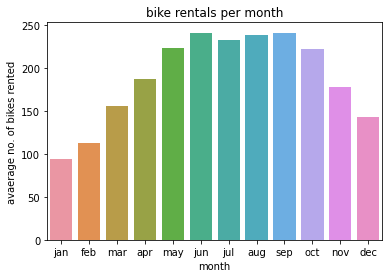

In [25]:
months = 'jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec'.split(',')
ax = sns.barplot('month', 'total_count', data=df_trainEx, estimator=np.mean, ci=None)
ax.set_ylabel('avaerage no. of bikes rented')
ax.set_xlabel('month')
ax.set_xticklabels(months)

plt.title('bike rentals per month')

plt.show()

/Users/ghaidaa/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


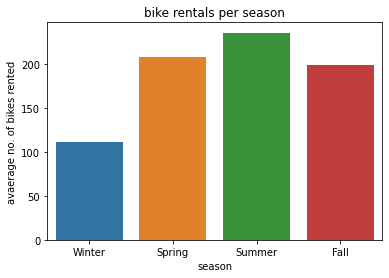

In [26]:
#season = 'Springer,Summer,Fall,Winter'.split(',')
ax = sns.barplot('season', 'total_count', data=df_trainEx, estimator=np.mean, ci=None)
ax.set_ylabel('avaerage no. of bikes rented')
ax.set_xlabel('season')
#ax.set_xticklabels(season)

plt.title('bike rentals per season')

plt.show()

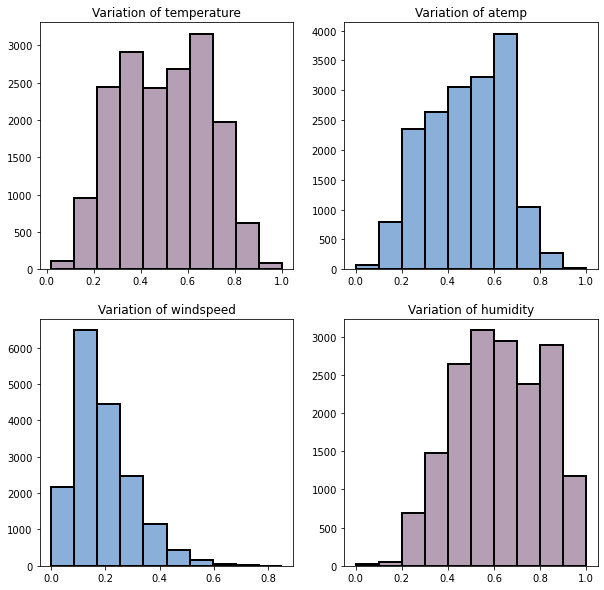

In [27]:
df_trainEx.temperature.unique()
fig,axes=plt.subplots(2,2)
axes[0,0].hist(x="temperature",data=df_trainEx,edgecolor="black",linewidth=2,color='#b49fb5')
axes[0,0].set_title("Variation of temperature")
axes[0,1].hist(x="atemp",data=df_trainEx,edgecolor="black",linewidth=2,color='#8ab0d9')
axes[0,1].set_title("Variation of atemp")
axes[1,0].hist(x="windspeed",data=df_trainEx,edgecolor="black",linewidth=2,color='#8ab0d9')
axes[1,0].set_title("Variation of windspeed")
axes[1,1].hist(x="humidity",data=df_trainEx,edgecolor="black",linewidth=2,color='#b49fb5')
axes[1,1].set_title("Variation of humidity")
fig.set_size_inches(10,10)

In [28]:
df_trainEx.head()

,rec_id,datetime,season,year,month,hr,is_holiday,weekday,is_workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,Winter,2011,1,0,No,Sunday,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,1,1,No,Sunday,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,1,2,No,Sunday,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,2011,1,3,No,Sunday,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,2011,1,4,No,Sunday,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


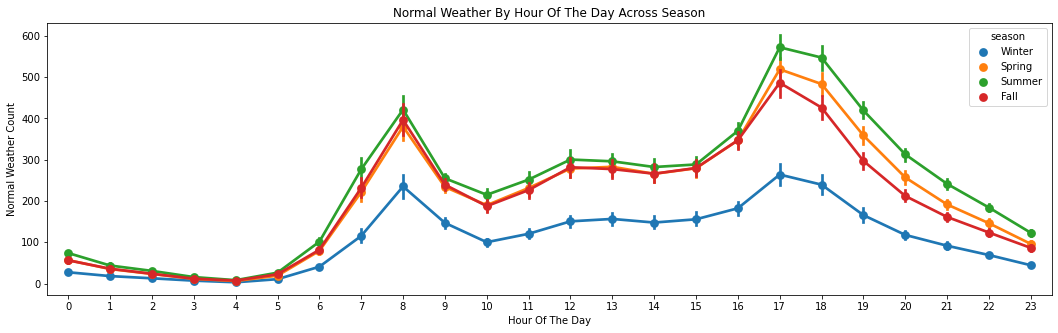

In [29]:
fig, ax = plt.subplots(figsize=(18, 5))
#seasons = ['spring', 'summer', 'fall', 'winter']
#ax.set_xticklabels(seasons)
sns.pointplot(x=df_trainEx["hr"], y=df_trainEx["total_count"], hue=df_trainEx["season"], ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Normal Weather Count', title="Normal Weather By Hour Of The Day Across Season");

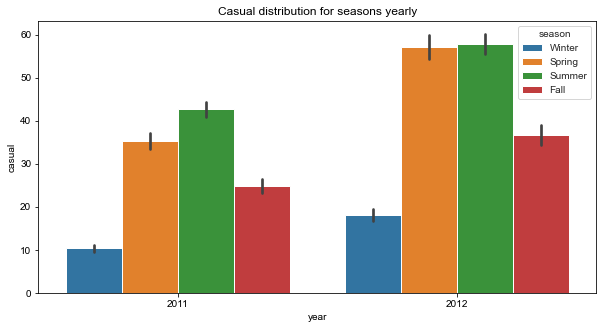

In [30]:
fig,ax=plt.subplots(figsize=(10,5))
sns.set_style('white')
sns.barplot(x='year',y='casual',data=df_trainEx,hue='season',ax=ax)
Years = '2011,2012'.split(',')
ax.set_xticklabels(Years)
ax.set_title('Casual distribution for seasons yearly')
plt.show()

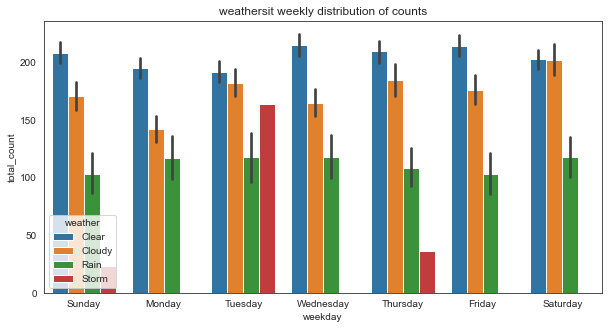

In [31]:
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(x='weekday',y='total_count',data=df_trainEx,hue='weather',ax=ax)
ax.set_title('weathersit weekly distribution of counts')
plt.show()

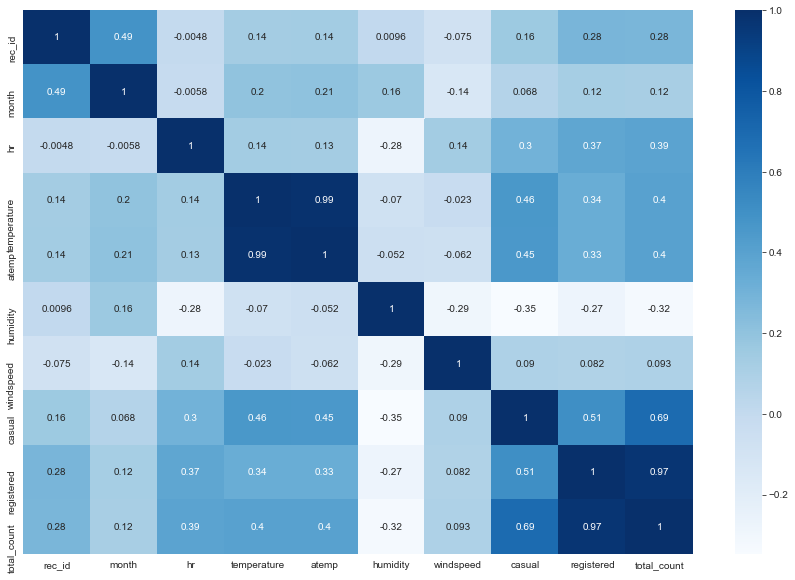

In [32]:
plt.subplots(figsize=(15,10))
sns.heatmap(df_trainEx.corr(), annot=True, cmap='Blues');

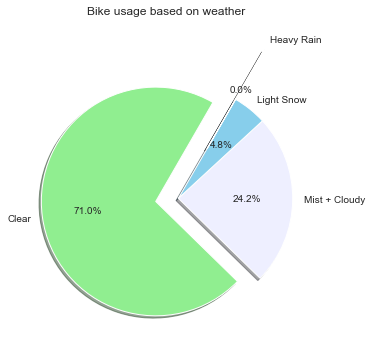

In [33]:
plt.figure(figsize=(5, 6))

labels = 'Clear', 'Mist + Cloudy', 'Light Snow', 'Heavy Rain'
sizes = df_trainEx.total_count.groupby(df_trainEx.weather).sum().tolist()
colors = ['lightgreen', '#eeefff', 'skyblue', 'black']
explode = (0.2, 0, 0, 0.5)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=60)
plt.axis('equal')
plt.title('Bike usage based on weather')
plt.show()

In [34]:
#sns.pairplot(df_trainEx,hue='season',palette='coolwarm')

In [35]:
data=pd.read_csv("/Users/ghaidaa/Desktop/Bike-sharing/hour.csv")

In [36]:

data = data.rename(columns = {'instant':'rec_id', 'dteday':'datetime','weathersit':'weather', 'cnt':'total_count', 'dteday':'datetime','mnth':'month','temp':'temperature','holiday':'is_holiday', 'workingday':'is_workingday','hum':'humidity','yr':'year'})




In [37]:
data.isna().sum()

rec_id           0
datetime         0
season           0
year             0
month            0
hr               0
is_holiday       0
weekday          0
is_workingday    0
weather          0
temperature      0
atemp            0
humidity         0
windspeed        0
casual           0
registered       0
total_count      0
dtype: int64

In [38]:
data.duplicated().sum()

0

In [39]:
data = pd.concat([data, pd.get_dummies(data['season'], prefix='season')],axis=1)

In [40]:
data = data.drop(["season"],axis=1)



In [41]:
data.isna().sum()

rec_id           0
datetime         0
year             0
month            0
hr               0
is_holiday       0
weekday          0
is_workingday    0
weather          0
temperature      0
atemp            0
humidity         0
windspeed        0
casual           0
registered       0
total_count      0
season_1         0
season_2         0
season_3         0
season_4         0
dtype: int64

In [42]:
data.shape


(17379, 20)

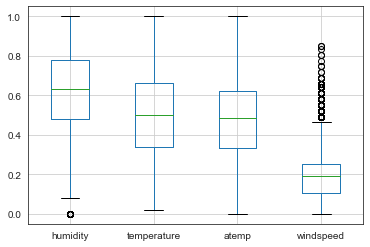

In [43]:
boxplot = data.boxplot(column=['humidity', 'temperature', 'atemp','windspeed'])

In [44]:
data.head()

,rec_id,datetime,year,month,hr,is_holiday,weekday,is_workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,total_count,season_1,season_2,season_3,season_4
0,1,2011-01-01,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1,0,0,0
1,2,2011-01-01,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1,0,0,0
2,3,2011-01-01,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,1,0,0,0
3,4,2011-01-01,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1,0,0,0
4,5,2011-01-01,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1,0,0,0


In [45]:
data.columns

Index(['rec_id', 'datetime', 'year', 'month', 'hr', 'is_holiday', 'weekday',
       'is_workingday', 'weather', 'temperature', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'total_count', 'season_1',
       'season_2', 'season_3', 'season_4'],
      dtype='object')

In [46]:

data=data.drop(['rec_id','datetime','casual','datetime'], axis=1)


In [47]:
data.isna().sum()

year             0
month            0
hr               0
is_holiday       0
weekday          0
is_workingday    0
weather          0
temperature      0
atemp            0
humidity         0
windspeed        0
registered       0
total_count      0
season_1         0
season_2         0
season_3         0
season_4         0
dtype: int64

In [48]:
#X_train, X_test, y_train, y_test = train_test_split(data[['year', 'month', 'hr', 'is_holiday', 'weekday',
      # 'is_workingday', 'weather', 'temperature', 'atemp', 'humidity', 'windspeed','registered','season_1',
     #  'season_2', 'season_3', 'season_4']], data[['total_count']], test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(data[[ 'month', 'hr', 'is_holiday', 'weekday',
       'is_workingday', 'weather', 'temperature', 'atemp', 'humidity', 'windspeed','season_1',
       'season_2', 'season_3', 'season_4']], data[['total_count']], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


#X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)



print("Training Data has",X_train.shape)
print("Validation Data has",X_val.shape)

Training Data has (11122, 14)
Validation Data has (2781, 14)


In [49]:
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler



In [50]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11122 entries, 504 to 10046
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          11122 non-null  int64  
 1   hr             11122 non-null  int64  
 2   is_holiday     11122 non-null  int64  
 3   weekday        11122 non-null  int64  
 4   is_workingday  11122 non-null  int64  
 5   weather        11122 non-null  int64  
 6   temperature    11122 non-null  float64
 7   atemp          11122 non-null  float64
 8   humidity       11122 non-null  float64
 9   windspeed      11122 non-null  float64
 10  season_1       11122 non-null  uint8  
 11  season_2       11122 non-null  uint8  
 12  season_3       11122 non-null  uint8  
 13  season_4       11122 non-null  uint8  
dtypes: float64(4), int64(6), uint8(4)
memory usage: 999.2 KB


In [51]:
# scaling the features
x_train_scaled = scaler.fit_transform(X_train)
x_train = pd.DataFrame(x_train_scaled)
x_test_scaled = scaler.transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

NameError: name 'scaler' is not defined

In [ ]:
X_train.head()

In [ ]:
X_test.head()

In [ ]:
lr=LinearRegression()
lr.fit(X_train,y_train)

In [ ]:

val = KFold(n_splits = 5)
cv_res = cross_val_score(lr,X_train,y_train,cv = val ,scoring = 'r2')

print('The R square: ',cv_res.mean())
y_pred=lr.predict(X_val)

score = r2_score(y_val,y_pred)
mse = mean_squared_error(y_pred,y_val)

print("Testing accuracy: ",score)
print('Mean Squared Error: ',mse)

In [ ]:
selected_columns = ['year', 'month', 'hr', 'is_holiday', 'weekday',
      'is_workingday', 'weather', 'temperature', 'atemp', 'humidity', 'windspeed','registered','season_1',
       'season_2', 'season_3', 'season_4']

In [ ]:
list(zip(selected_columns, lr.coef_.squeeze()))

In [ ]:
X_train.describe()